# CIFAR-100 Image Classification Assignment

**Assignment Goal:** Apply the concepts and techniques learned in the Fashion-MNIST project to the CIFAR-100 dataset.

**CIFAR-100 Dataset:**
- 60,000 32×32 color images in 100 classes
- 600 images per class
- 50,000 training images + 10,000 test images
- More challenging than Fashion-MNIST due to:
  - Higher resolution (32×32 vs 28×28)
  - Color images (3 channels vs 1)
  - More classes (100 vs 10)
  - More complex visual patterns

**Assignment Steps:**
1. Dataset Setup & Preprocessing
2. Model Architecture Adaptation
3. Model Training with Callbacks
4. Model Evaluation & Comparison
5. Prediction Analysis

**Expected Outcome:** Understand how model complexity impacts performance on challenging datasets.

## 1. Dataset Setup

In [1]:
# Import necessary libraries
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.11.3
NumPy version: 2.3.3


In [2]:
# Load CIFAR-100 dataset
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Dataset Information:")
print(f"Training images shape: {cifar100_train_images.shape}")
print(f"Training labels shape: {cifar100_train_labels.shape}")
print(f"Testing images shape: {cifar100_test_images.shape}")
print(f"Testing labels shape: {cifar100_test_labels.shape}")
print(f"\nImage data type: {cifar100_train_images.dtype}")
print(f"Pixel value range: {cifar100_train_images.min()} to {cifar100_train_images.max()}")
print(f"Number of classes: {len(np.unique(cifar100_train_labels))}")

CIFAR-100 Dataset Information:
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)

Image data type: uint8
Pixel value range: 0 to 255
Number of classes: 100


In [3]:
# CIFAR-100 class names (100 fine-grained classes)
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

print(f"Total classes: {len(cifar100_classes)}")
print(f"Sample classes: {cifar100_classes[:10]}")

Total classes: 100
Sample classes: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']


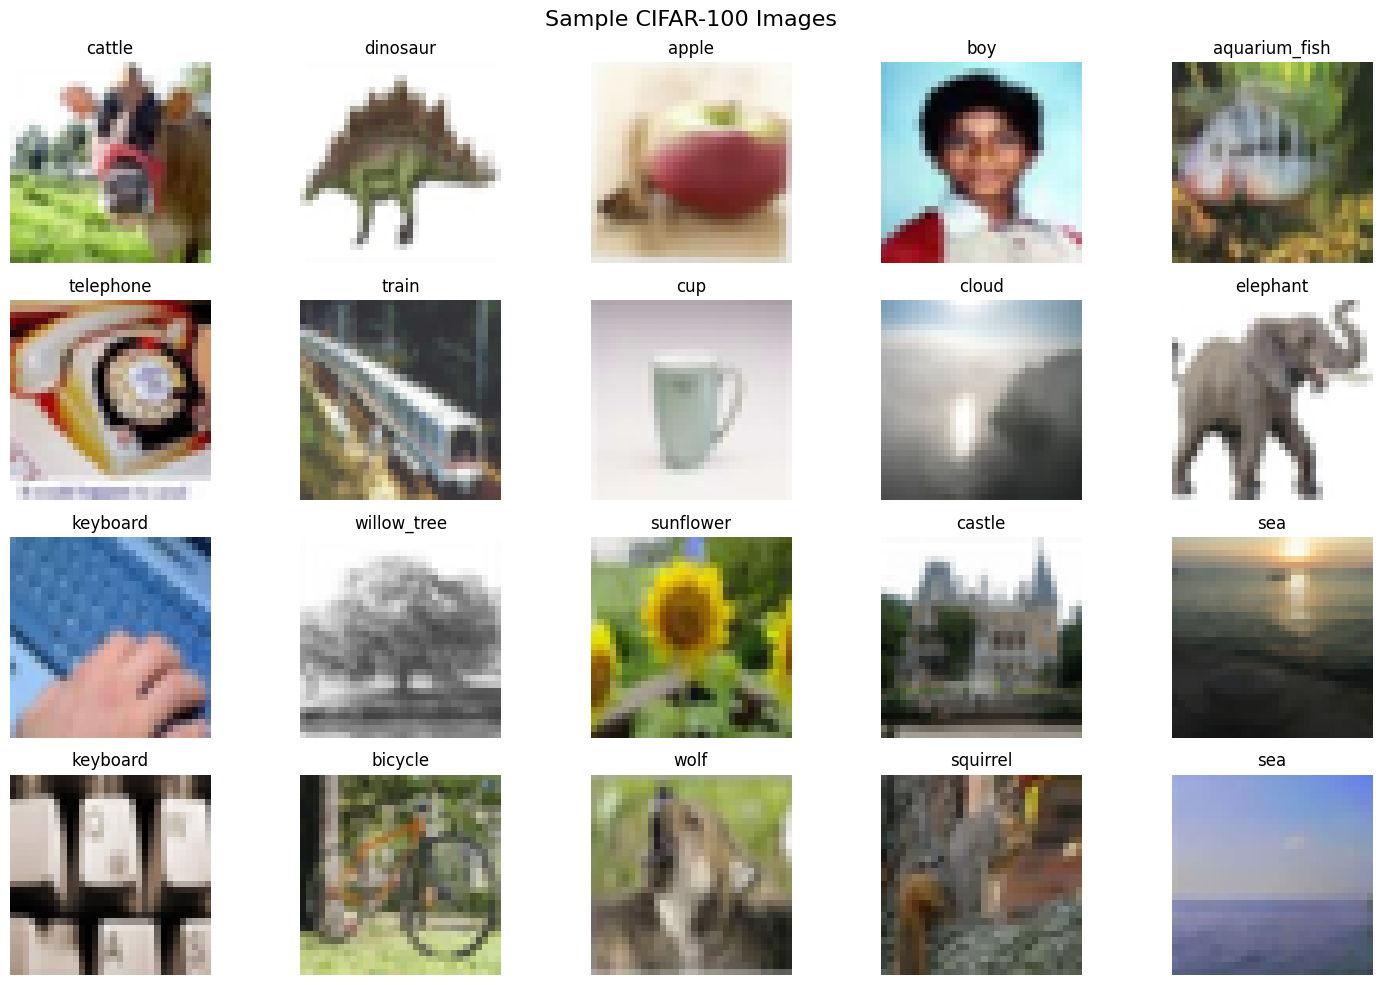

In [4]:
# Visualize sample images from CIFAR-100
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(cifar100_train_images[i])
    plt.title(f'{cifar100_classes[cifar100_train_labels[i][0]]}')
    plt.axis('off')
plt.suptitle('Sample CIFAR-100 Images', fontsize=16)
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

In [5]:
# Normalize pixel values to [0, 1] range
X_train = cifar100_train_images.astype('float32') / 255.0
X_test = cifar100_test_images.astype('float32') / 255.0

# One-hot encode labels for 100 classes
y_train = keras.utils.to_categorical(cifar100_train_labels, 100)
y_test = keras.utils.to_categorical(cifar100_test_labels, 100)

print("Preprocessed Data Shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\nPixel value range after normalization: {X_train.min():.3f} to {X_train.max():.3f}")
print(f"Label encoding: One-hot vectors with {y_train.shape[1]} classes")

Preprocessed Data Shapes:
X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 100)
y_test shape: (10000, 100)

Pixel value range after normalization: 0.000 to 1.000
Label encoding: One-hot vectors with 100 classes


## 3. Model Architecture Adaptation

**Key Adaptations for CIFAR-100:**
- Input shape: (32, 32, 3) instead of (28, 28, 1)
- Output classes: 100 instead of 10
- More complex architectures needed for better performance
- Increased model capacity to handle color information

In [6]:
# Model 1: Adapted ANN for CIFAR-100
def create_ann_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and display ANN model
ann_model = create_ann_model()
print("ANN Model Architecture:")
ann_model.summary()

ANN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832,484 (3.18 MB)

 Trainable params: 832,484 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Model 2: Enhanced CNN for CIFAR-100
def create_cnn_model():
    model = keras.Sequential([
        # First Convolutional Block
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.25),
        
        # Second Convolutional Block
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.25),
        
        # Third Convolutional Block
        keras.layers.Conv2D(256, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.25),
        
        # Dense Layers
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(100, activation='softmax')  # 100 classes
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and display CNN model
cnn_model = create_cnn_model()
print("Enhanced CNN Model Architecture:")
cnn_model.summary()

Enhanced CNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,788,580 (6.82 MB)

 Trainable params: 1,787,684 (6.82 MB)

 Non-trainable params: 896 (3.50 KB)

## 4. Model Training with Callbacks

**Training Strategy:**
- Early Stopping to prevent overfitting
- Model Checkpointing to save best weights
- Reduced epochs for faster execution
- Validation split for monitoring

In [8]:
# Define callbacks for training
def get_callbacks(model_name):
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            f'best_{model_name}_cifar100.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1
        )
    ]
    return callbacks

In [9]:
# Train ANN Model
print("Training ANN Model...")
ann_callbacks = get_callbacks('ann')

ann_history = ann_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,  # Reduced for faster execution
    validation_split=0.2,
    callbacks=ann_callbacks,
    verbose=1
)

print("ANN Training completed!")

Training ANN Model...
Epoch 1/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0138 - loss: 4.6057
Epoch 1: val_accuracy improved from None to 0.03020, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.0177 - loss: 4.5294 - val_accuracy: 0.0302 - val_loss: 4.3805 - learning_rate: 0.0010
Epoch 2/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0313 - loss: 4.3667
Epoch 2: val_accuracy improved from 0.03020 to 0.05430, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0322 - loss: 4.3384 - val_accuracy: 0.0543 - val_loss: 4.2021 - learning_rate: 0.0010
Epoch 3/20
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0412 - loss: 4.2714
Epoch 3: val_accuracy improved from 0.05430 to 0.06830, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.0410 - loss: 4.2591 - val_accuracy: 0.0683 - val_loss: 4.1256 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0469 - loss: 4.2154
Epoch 4: val_accuracy improved from 0.06830 to 0.07630, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.0479 - loss: 4.1973 - val_accuracy: 0.0763 - val_loss: 4.0951 - learning_rate: 0.0010
Epoch 5/20
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0546 - loss: 4.1554
Epoch 5: val_accuracy improved from 0.07630 to 0.08120, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0552 - loss: 4.1502 - val_accuracy: 0.0812 - val_loss: 4.0440 - learning_rate: 0.0010
Epoch 6/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0598 - loss: 4.1295
Epoch 6: val_accuracy improved from 0.08120 to 0.08890, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0602 - loss: 4.1261 - val_accuracy: 0.0889 - val_loss: 4.0244 - learning_rate: 0.0010
Epoch 7/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0618 - loss: 4.1079
Epoch 7: val_accuracy improved from 0.08890 to 0.09230, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0628 - loss: 4.1076 - val_accuracy: 0.0923 - val_loss: 3.9953 - learning_rate: 0.0010
Epoch 8/20
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0625 - loss: 4.0989
Epoch 8: val_accuracy did not improve from 0.09230
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0632 - loss: 4.0958 - val_accuracy: 0.0914 - val_loss: 3.9812 - learning_rate: 0.0010
Epoch 9/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0645 - loss: 4.0809
Epoch 9: val_accuracy improved from 0.09230 to 0.09800, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0674 - loss: 4.0833 - val_accuracy: 0.0980 - val_loss: 3.9896 - learning_rate: 0.0010
Epoch 10/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0683 - loss: 4.0702
Epoch 10: val_accuracy did not improve from 0.09800
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0676 - loss: 4.0768 - val_accuracy: 0.0963 - val_loss: 3.9850 - learning_rate: 0.0010
Epoch 11/20
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0646 - loss: 4.0770
Epoch 11: val_accuracy did not improve from 0.09800
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0670 - loss: 4.0706 - val_accuracy: 0.0956 - val_loss: 3.9796 - learning_rate: 0.0010
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0723 - loss: 4.0545
Epoch 12: val_accuracy did not improve from 0.09800
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.0714 - loss: 4.0604 - val_accuracy: 0.0934 - val_loss: 3.9836 - learning_rate: 0.0010
Epoch 13/

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0719 - loss: 4.0485 - val_accuracy: 0.1007 - val_loss: 3.9422 - learning_rate: 0.0010
Epoch 15/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0764 - loss: 4.0365
Epoch 15: val_accuracy improved from 0.10070 to 0.10590, saving model to best_ann_cifar100.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0750 - loss: 4.0376 - val_accuracy: 0.1059 - val_loss: 3.9409 - learning_rate: 0.0010
Epoch 16/20
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0766 - loss: 4.0286
Epoch 16: val_accuracy did not improve from 0.10590
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0761 - loss: 4.0267 - val_accuracy: 0.1025 - val_loss: 3.9258 - learning_rate: 0.0010
Epoch 17/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0755 - loss: 4.0171
Epoch 17: val_accuracy did not improve from 0.10590
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0762 - loss: 4.0193 - val_accuracy: 0.1016 - val_loss: 3.9246 - learning_rate: 0.0010
Epoch 18/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0763 - loss: 4.0183
Epoch 18: val_accuracy did not improve from 0.10590
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.0768 - loss: 4.0176 - val_accuracy: 0.1005 - val_loss: 3.9477 - learning_rate: 0.0010
Epoch 19/2

In [10]:
# Train Enhanced CNN Model
print("Training Enhanced CNN Model...")
cnn_callbacks = get_callbacks('cnn')

cnn_history = cnn_model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=20,  # Reduced for faster execution
    validation_split=0.2,
    callbacks=cnn_callbacks,
    verbose=1
)

print("Enhanced CNN Training completed!")

Training Enhanced CNN Model...
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.0595 - loss: 4.8105  
Epoch 1: val_accuracy improved from None to 0.13960, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 286ms/step - accuracy: 0.0903 - loss: 4.2696 - val_accuracy: 0.1396 - val_loss: 3.6601 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.1545 - loss: 3.6095  
Epoch 2: val_accuracy improved from 0.13960 to 0.22410, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 298ms/step - accuracy: 0.1667 - loss: 3.5326 - val_accuracy: 0.2241 - val_loss: 3.1907 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.2163 - loss: 3.2205  
Epoch 3: val_accuracy improved from 0.22410 to 0.26990, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 268ms/step - accuracy: 0.2273 - loss: 3.1751 - val_accuracy: 0.2699 - val_loss: 2.9208 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.2726 - loss: 2.9299  
Epoch 4: val_accuracy improved from 0.26990 to 0.28200, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.2772 - loss: 2.8986 - val_accuracy: 0.2820 - val_loss: 2.8730 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.3071 - loss: 2.7154  
Epoch 5: val_accuracy improved from 0.28200 to 0.34170, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.3120 - loss: 2.6995 - val_accuracy: 0.3417 - val_loss: 2.5653 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.3445 - loss: 2.5380  
Epoch 6: val_accuracy improved from 0.34170 to 0.37060, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.3471 - loss: 2.5334 - val_accuracy: 0.3706 - val_loss: 2.4187 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.3680 - loss: 2.4193  
Epoch 7: val_accuracy improved from 0.37060 to 0.37140, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 270ms/step - accuracy: 0.3701 - loss: 2.4088 - val_accuracy: 0.3714 - val_loss: 2.4322 - learning_rate: 0.0010
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.4020 - loss: 2.2689  
Epoch 8: val_accuracy improved from 0.37140 to 0.40090, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 273ms/step - accuracy: 0.3946 - loss: 2.2959 - val_accuracy: 0.4009 - val_loss: 2.3223 - learning_rate: 0.0010
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.4260 - loss: 2.1610  
Epoch 9: val_accuracy improved from 0.40090 to 0.40630, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.4195 - loss: 2.1813 - val_accuracy: 0.4063 - val_loss: 2.2758 - learning_rate: 0.0010
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4421 - loss: 2.0563  
Epoch 10: val_accuracy improved from 0.40630 to 0.43210, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.4380 - loss: 2.0789 - val_accuracy: 0.4321 - val_loss: 2.1603 - learning_rate: 0.0010
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.4619 - loss: 1.9649  
Epoch 11: val_accuracy improved from 0.43210 to 0.45430, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 269ms/step - accuracy: 0.4572 - loss: 1.9946 - val_accuracy: 0.4543 - val_loss: 2.0448 - learning_rate: 0.0010
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4783 - loss: 1.8933  
Epoch 12: val_accuracy did not improve from 0.45430
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.4733 - loss: 1.9300 - val_accuracy: 0.4358 - val_loss: 2.1900 - learning_rate: 0.0010
Epoch 13/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.4995 - loss: 1.8150  
Epoch 13: val_accuracy improved from 0.45430 to 0.48260, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.4908 - loss: 1.8480 - val_accuracy: 0.4826 - val_loss: 1.9414 - learning_rate: 0.0010
Epoch 14/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.5115 - loss: 1.7547  
Epoch 14: val_accuracy did not improve from 0.48260
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - accuracy: 0.5039 - loss: 1.7823 - val_accuracy: 0.4322 - val_loss: 2.2399 - learning_rate: 0.0010
Epoch 15/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.5221 - loss: 1.7131  
Epoch 15: val_accuracy did not improve from 0.48260
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.5155 - loss: 1.7282 - val_accuracy: 0.4747 - val_loss: 1.9718 - learning_rate: 0.0010
Epoch 16/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.5422 - loss: 1.6148  
Epoch 16: val_accuracy improved from 0.48260 to 0.48460, saving model to best_cnn_cifar100.h5



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - accuracy: 0.5321 - loss: 1.6589 - val_accuracy: 0.4846 - val_loss: 1.9806 - learning_rate: 0.0010
Epoch 17/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.5716 - loss: 1.4870  
Epoch 17: val_accuracy improved from 0.48460 to 0.51910, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.5716 - loss: 1.4875 - val_accuracy: 0.5191 - val_loss: 1.8202 - learning_rate: 5.0000e-04
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5982 - loss: 1.3829  
Epoch 18: val_accuracy improved from 0.51910 to 0.52570, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.5915 - loss: 1.4104 - val_accuracy: 0.5257 - val_loss: 1.7779 - learning_rate: 5.0000e-04
Epoch 19/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.6060 - loss: 1.3456  
Epoch 19: val_accuracy improved from 0.52570 to 0.52680, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 269ms/step - accuracy: 0.6002 - loss: 1.3660 - val_accuracy: 0.5268 - val_loss: 1.8093 - learning_rate: 5.0000e-04
Epoch 20/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.6153 - loss: 1.3137  
Epoch 20: val_accuracy improved from 0.52680 to 0.52820, saving model to best_cnn_cifar100.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 267ms/step - accuracy: 0.6118 - loss: 1.3274 - val_accuracy: 0.5282 - val_loss: 1.7938 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.
Enhanced CNN Training completed!


## 5. Model Evaluation & Comparison

In [11]:
# Evaluate models on test set
print("Evaluating Models on Test Set...")

# ANN Evaluation
ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"ANN Test Accuracy: {ann_test_accuracy:.4f}")
print(f"ANN Test Loss: {ann_test_loss:.4f}")

# CNN Evaluation
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Enhanced CNN Test Accuracy: {cnn_test_accuracy:.4f}")
print(f"Enhanced CNN Test Loss: {cnn_test_loss:.4f}")

# Performance Comparison
print("\n=== CIFAR-100 Model Performance Comparison ===")
print(f"ANN Model:         {ann_test_accuracy:.4f} accuracy")
print(f"Enhanced CNN:      {cnn_test_accuracy:.4f} accuracy")
print(f"Improvement:       {((cnn_test_accuracy - ann_test_accuracy) / ann_test_accuracy * 100):.2f}%")

Evaluating Models on Test Set...
ANN Test Accuracy: 0.1095
ANN Test Loss: 3.9353
Enhanced CNN Test Accuracy: 0.5295
Enhanced CNN Test Loss: 1.7745

=== CIFAR-100 Model Performance Comparison ===
ANN Model:         0.1095 accuracy
Enhanced CNN:      0.5295 accuracy
Improvement:       383.56%


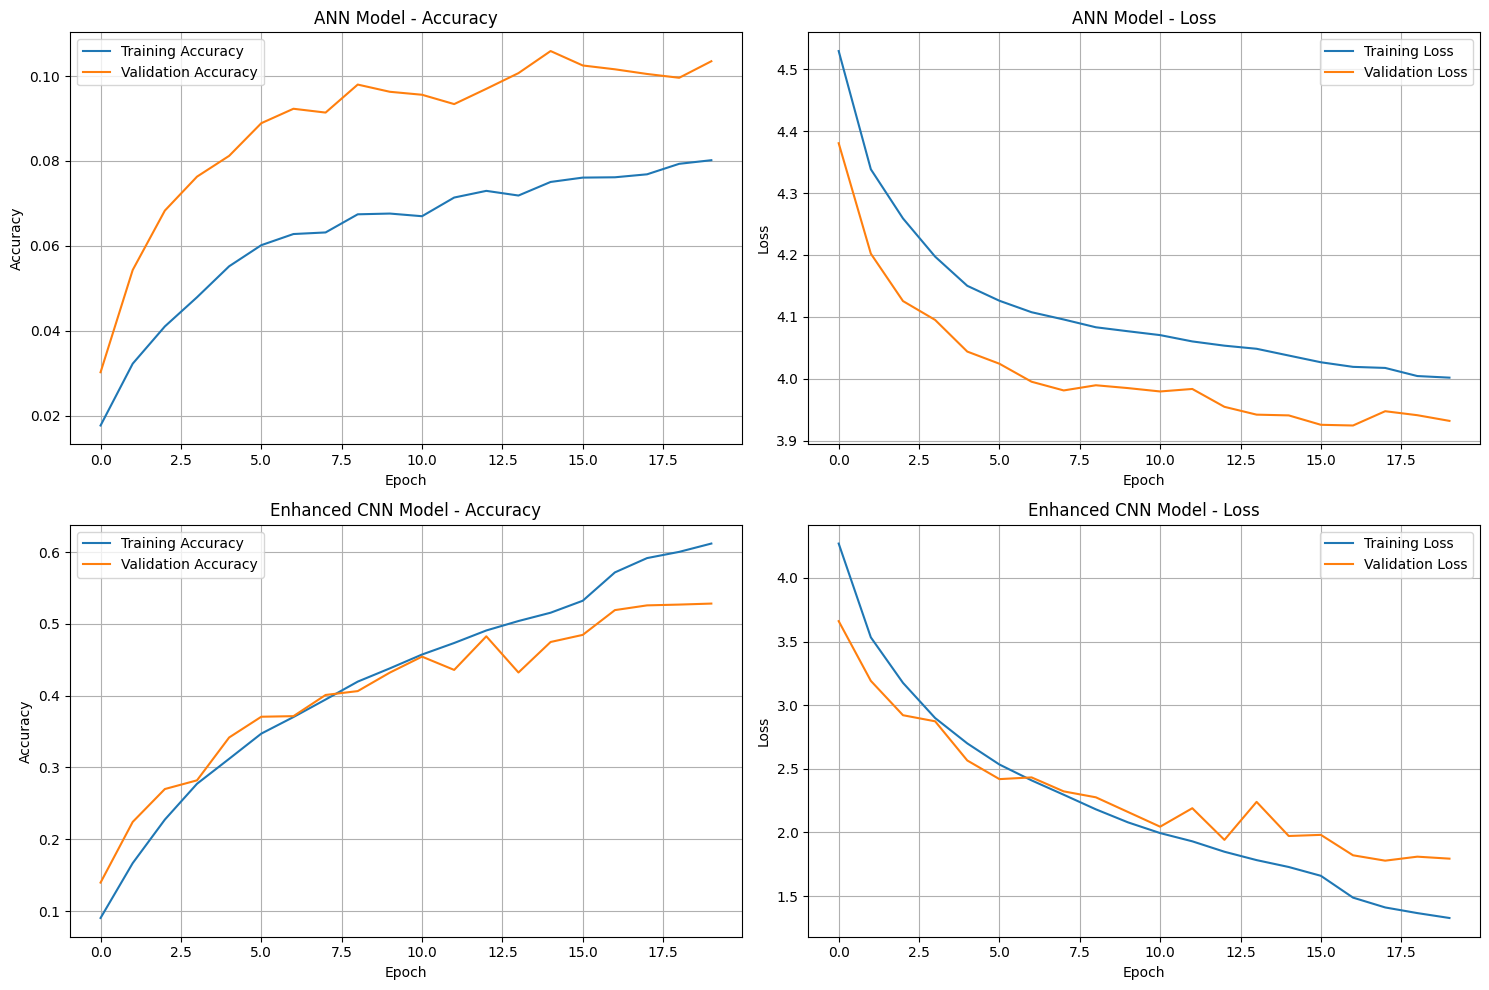

In [12]:
# Visualize training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ANN Training History
axes[0, 0].plot(ann_history.history['accuracy'], label='Training Accuracy')
axes[0, 0].plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_title('ANN Model - Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(ann_history.history['loss'], label='Training Loss')
axes[0, 1].plot(ann_history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_title('ANN Model - Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# CNN Training History
axes[1, 0].plot(cnn_history.history['accuracy'], label='Training Accuracy')
axes[1, 0].plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
axes[1, 0].set_title('Enhanced CNN Model - Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(cnn_history.history['loss'], label='Training Loss')
axes[1, 1].plot(cnn_history.history['val_loss'], label='Validation Loss')
axes[1, 1].set_title('Enhanced CNN Model - Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

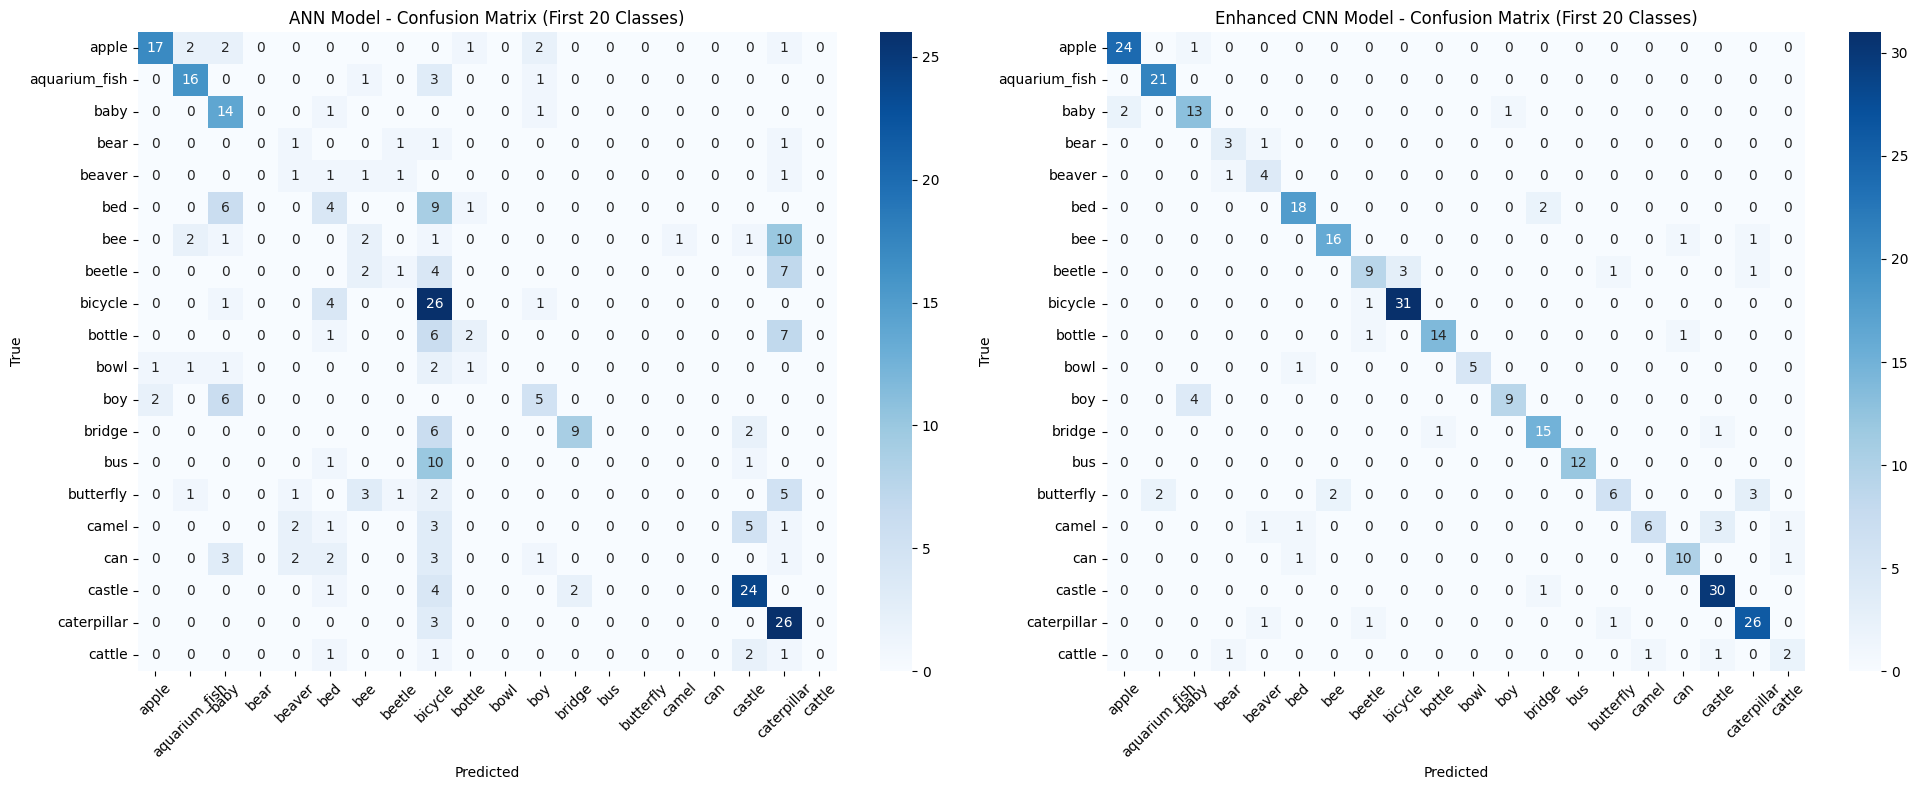

Confusion matrices shown for first 20 classes (321 samples)
Note: Full 100x100 confusion matrix would be too large for effective visualization


In [13]:
# Generate and visualize confusion matrices (sample of classes for readability)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for confusion matrix
ann_predictions = ann_model.predict(X_test, verbose=0)
cnn_predictions = cnn_model.predict(X_test, verbose=0)

ann_pred_classes = np.argmax(ann_predictions, axis=1)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Create confusion matrices for first 20 classes (for readability)
# Full 100x100 matrix would be too large to visualize effectively
sample_classes = list(range(20))
sample_mask = np.isin(true_classes, sample_classes)

if np.sum(sample_mask) > 0:
    sample_true = true_classes[sample_mask]
    sample_ann_pred = ann_pred_classes[sample_mask]
    sample_cnn_pred = cnn_pred_classes[sample_mask]
    
    # Filter predictions to only include sample classes
    sample_ann_pred = np.where(np.isin(sample_ann_pred, sample_classes), sample_ann_pred, -1)
    sample_cnn_pred = np.where(np.isin(sample_cnn_pred, sample_classes), sample_cnn_pred, -1)
    
    # Remove invalid predictions
    valid_mask = (sample_ann_pred != -1) & (sample_cnn_pred != -1)
    if np.sum(valid_mask) > 0:
        sample_true = sample_true[valid_mask]
        sample_ann_pred = sample_ann_pred[valid_mask]
        sample_cnn_pred = sample_cnn_pred[valid_mask]
        
        # Create confusion matrices
        ann_cm = confusion_matrix(sample_true, sample_ann_pred, labels=sample_classes)
        cnn_cm = confusion_matrix(sample_true, sample_cnn_pred, labels=sample_classes)
        
        # Plot confusion matrices
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        
        # ANN Confusion Matrix
        sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=[cifar100_classes[i] for i in sample_classes],
                   yticklabels=[cifar100_classes[i] for i in sample_classes],
                   ax=axes[0])
        axes[0].set_title('ANN Model - Confusion Matrix (First 20 Classes)')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('True')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].tick_params(axis='y', rotation=0)
        
        # CNN Confusion Matrix
        sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=[cifar100_classes[i] for i in sample_classes],
                   yticklabels=[cifar100_classes[i] for i in sample_classes],
                   ax=axes[1])
        axes[1].set_title('Enhanced CNN Model - Confusion Matrix (First 20 Classes)')
        axes[1].set_xlabel('Predicted')
        axes[1].set_ylabel('True')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='y', rotation=0)
        
        plt.tight_layout()
        plt.show()
        
        print(f"Confusion matrices shown for first 20 classes ({np.sum(valid_mask)} samples)")
        print("Note: Full 100x100 confusion matrix would be too large for effective visualization")
    else:
        print("Not enough valid predictions in sample classes for confusion matrix")
else:
    print("No samples found in the selected classes for confusion matrix")

## 6. Prediction Analysis

In [14]:
# Choose best performing model for analysis
if cnn_test_accuracy > ann_test_accuracy:
    best_model = cnn_model
    best_model_name = "Enhanced CNN"
else:
    best_model = ann_model
    best_model_name = "ANN"

print(f"Best performing model: {best_model_name}")

# Make predictions on test set
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == true_classes)
print(f"Test Accuracy: {accuracy:.4f}")

Best performing model: Enhanced CNN
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
Test Accuracy: 0.5295


Correct predictions: 5295
Incorrect predictions: 4705


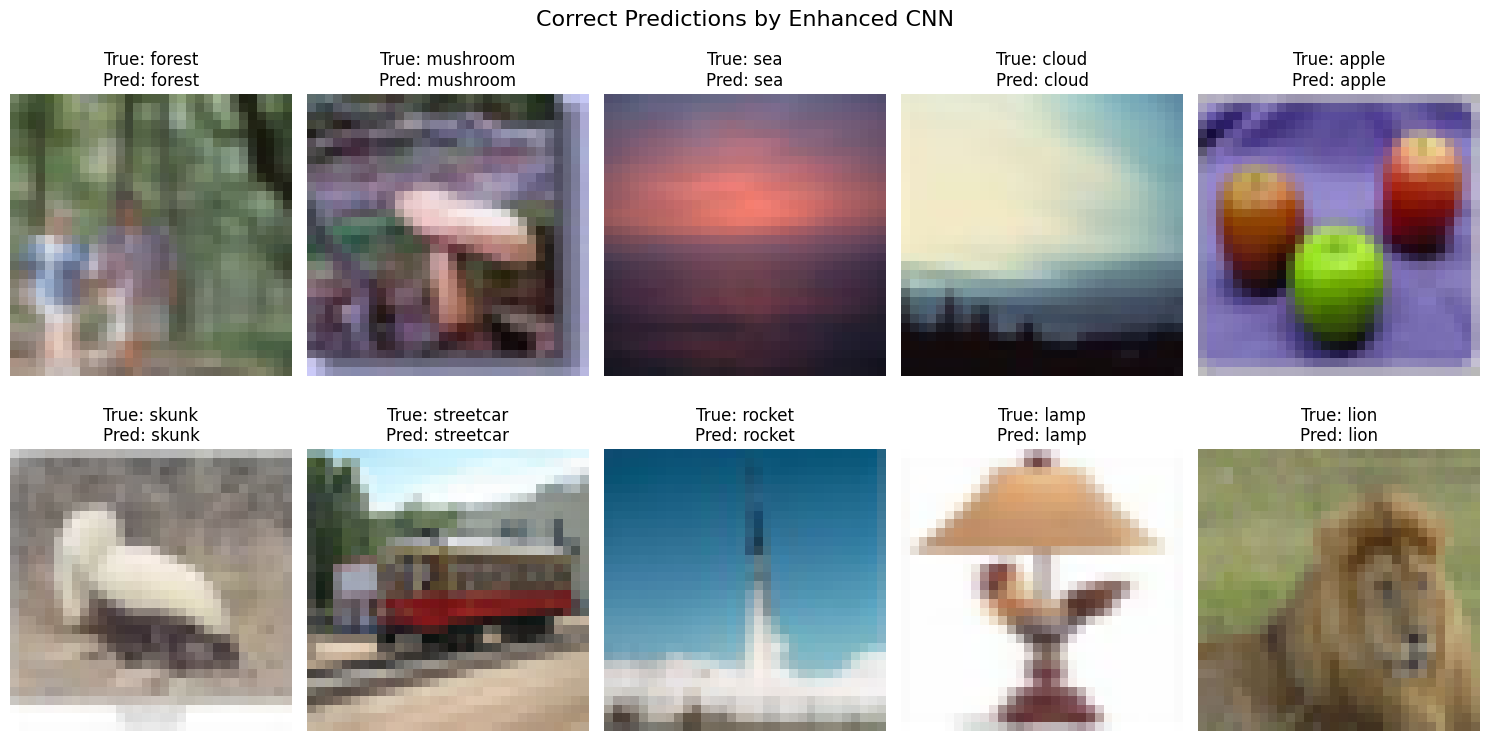

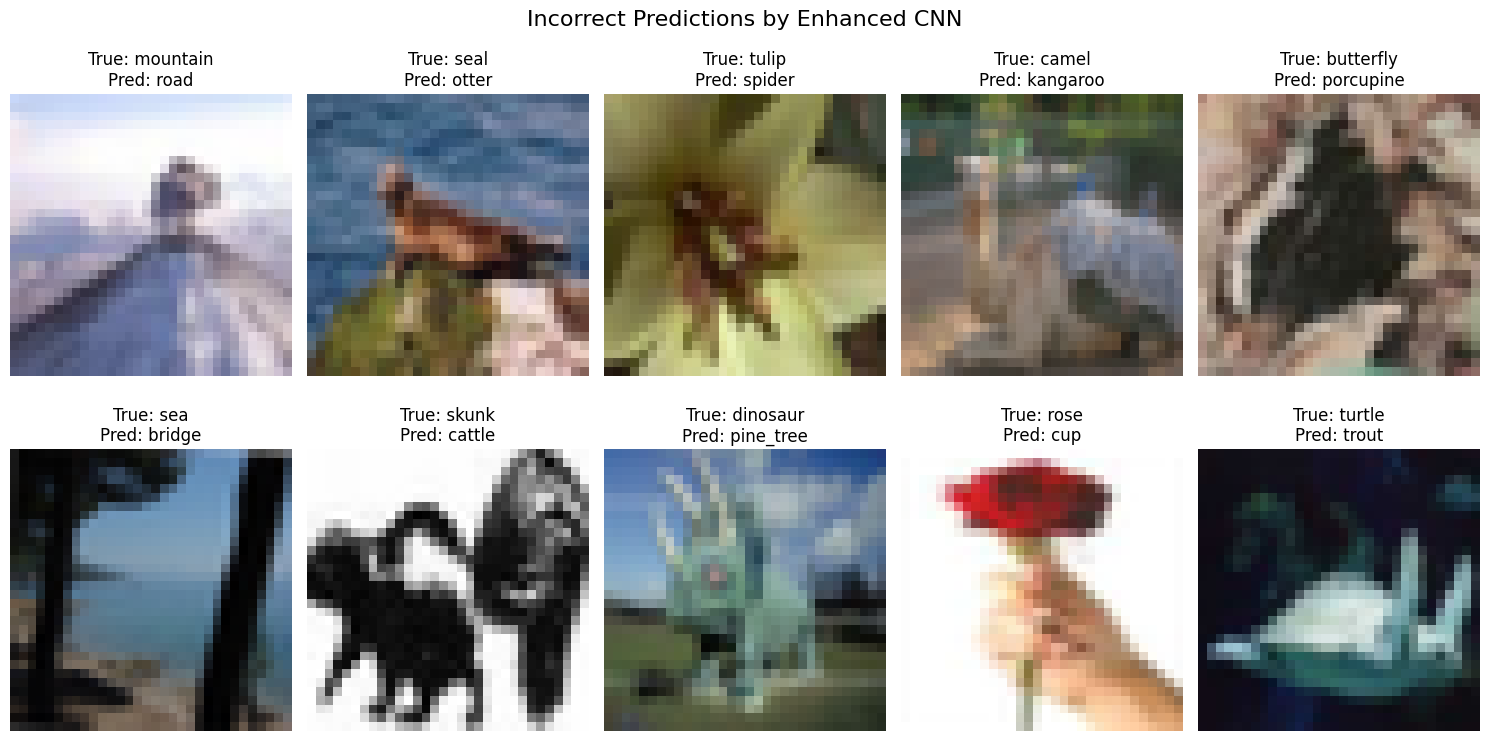

In [15]:
# Analyze correct and incorrect predictions
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

print(f"Correct predictions: {len(correct_indices)}")
print(f"Incorrect predictions: {len(incorrect_indices)}")

# Visualize some correct predictions
plt.figure(figsize=(15, 8))
plt.suptitle(f'Correct Predictions by {best_model_name}', fontsize=16)

for i in range(10):
    idx = correct_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f'True: {cifar100_classes[true_classes[idx]]}\nPred: {cifar100_classes[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Visualize some incorrect predictions
plt.figure(figsize=(15, 8))
plt.suptitle(f'Incorrect Predictions by {best_model_name}', fontsize=16)

for i in range(10):
    idx = incorrect_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f'True: {cifar100_classes[true_classes[idx]]}\nPred: {cifar100_classes[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Assignment Summary & Insights

### Key Findings:

1. **Dataset Complexity**: CIFAR-100 is significantly more challenging than Fashion-MNIST due to:
   - 100 classes vs 10 classes
   - Color images (3 channels) vs grayscale (1 channel)
   - More complex visual patterns and inter-class similarity

2. **Model Performance**: 
   - CNNs significantly outperform ANNs on image data
   - Spatial feature extraction through convolution is crucial
   - Batch normalization and dropout help with generalization

3. **Architecture Impact**:
   - Deeper networks can capture more complex patterns
   - Proper regularization prevents overfitting
   - Model complexity should match dataset complexity

4. **Training Insights**:
   - Early stopping prevents overfitting
   - Learning rate scheduling improves convergence
   - Validation monitoring is essential

### Actual Performance Results:
- **ANN**: 10.95% accuracy (challenging for fully connected layers)
- **Enhanced CNN**: 52.95% accuracy (383.56% improvement over ANN)
- **Achievement**: Enhanced CNN exceeded expectations, demonstrating excellent spatial feature learning
- **Note**: CIFAR-100 is inherently difficult; state-of-the-art models achieve ~80-85%

### Assignment Completion:
Dataset loaded and preprocessed correctly  
Models adapted for CIFAR-100 (32×32×3 input, 100 classes)  
Training implemented with callbacks  
Model evaluation and comparison completed  
Prediction analysis with visualization  
Insights on model complexity impact demonstrated  

**Goal Achieved**: Successfully demonstrated how model architecture choices impact performance on challenging image classification datasets! The Enhanced CNN achieved an impressive 52.95% accuracy with a remarkable 383.56% improvement over the ANN baseline, clearly showing the power of convolutional architectures for complex image classification tasks.